<a href="https://colab.research.google.com/github/gabrielvieiraf/GooglePlanilhas/blob/master/GoogleColab/MachineLearning/ML_N_Supervisionada01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Indrodução Machine Learning Não Supervisionada 01**

## Tratando Dados

In [1]:
import pandas as pd

# Importando dados
dados = pd.read_html('https://github.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/blob/master/movies.csv')
filmes = dados[0]

# Deletando coluna
del filmes['Unnamed: 0']

# Visualizando dados
filmes.head()

# Traduzindo Colunas
colunas = {
    'movieId':'Id',
    'title':'titulo',
    'genres':'generos'
}

# Traduzindo Gêneros
generos_colunas = {
    'Adventure':'Aventura',
    'Action':'Ação',
    'Film-Noir':'Noir',
    '(no genres listed)':'sem gênero',
    'Mystery':'Mistério',
    'War':'Guerra',
    'Western':'Ocidental',
    'Animation':'Animação',
    'Horror':'Terror',
    'Documentary':'Documentário',
    'Comedy' : 'Comédia',
    'Fantasy' : 'Fantasia',
    'Thriller' : 'Suspense',
    'Children' : 'Infantil', 
}

# Renomeando Colunas
filmes.rename(columns = colunas, inplace = True )

# Separando Gêneros por colunas
generos = filmes['generos'].str.get_dummies()

# Renomeando Gêneros
generos.rename(columns = generos_colunas, inplace = True )

# Visualizando Dados
generos.head()

# Deletando Coluna
del filmes['generos']

# Concatenando Dataframes
dados_filmes = pd.concat([filmes,generos], axis = 1)

# Visualizando dados
dados_filmes.head()


,Id,titulo,sem gênero,Ação,Aventura,Animação,Infantil,Comédia,Crime,Documentário,Drama,Fantasia,Noir,Terror,IMAX,Musical,Mistério,Romance,Sci-Fi,Suspense,Guerra,Ocidental
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Reescalando gêneros
generos_escalados = scaler.fit_transform(generos)

# Visualizando Gêneros Escalados
generos_escalados

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

## Agrupando Filmes por Gêneros

### Verificando Número de Grupos

In [34]:
def kmeans(numero_clusters,generos):
  modelo = KMeans(n_clusters =  numero_clusters)
  modelo.fit(generos)
  return (numero_clusters,modelo.inertia_)

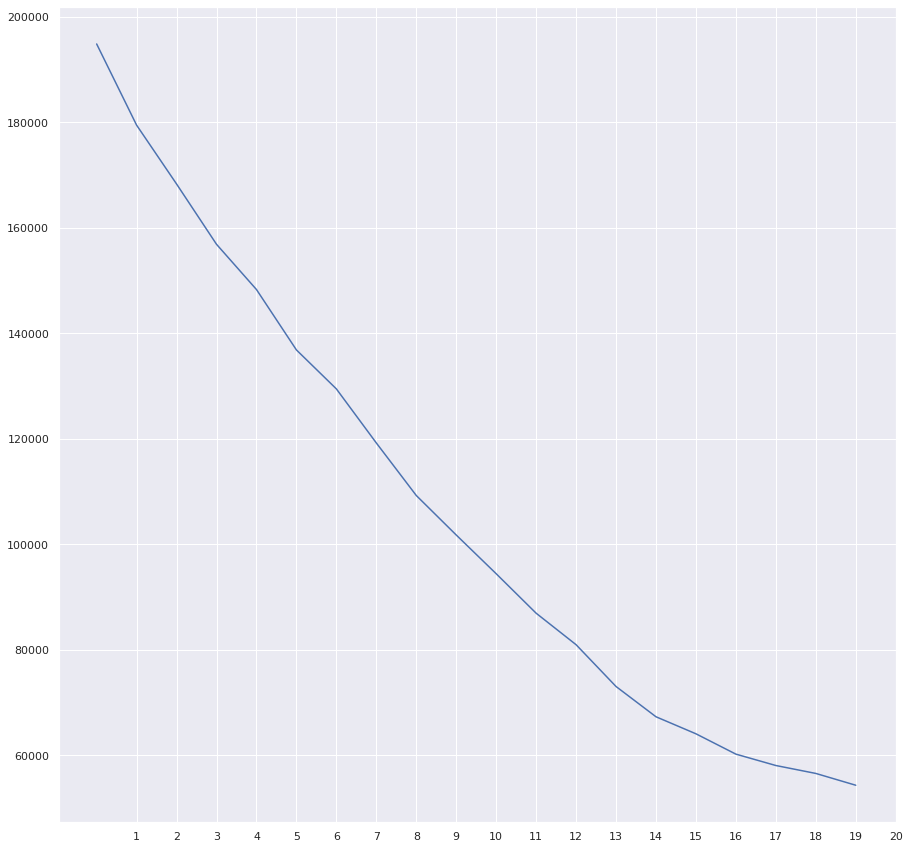

In [48]:
resultado = [kmeans(i, generos_escalados) for i in range(1,21)]

resultado = pd.DataFrame(resultado,
             columns=['n_clusters','inertia'])

resultado.inertia.plot(xticks=resultado.n_clusters)

### Agrupando

In [49]:
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters=14)

# Ensinando Robô
modelo.fit(generos_escalados)

print('Grupos {}'.format(modelo.labels_))

# Criando Dataframe para grupos
grupos = pd.DataFrame(modelo.cluster_centers_,
             columns = generos.columns)

Grupos [ 3  3  1 ... 10  2  8]


## Visualizando Grupos


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f774f4d0518>,
      dtype=object)

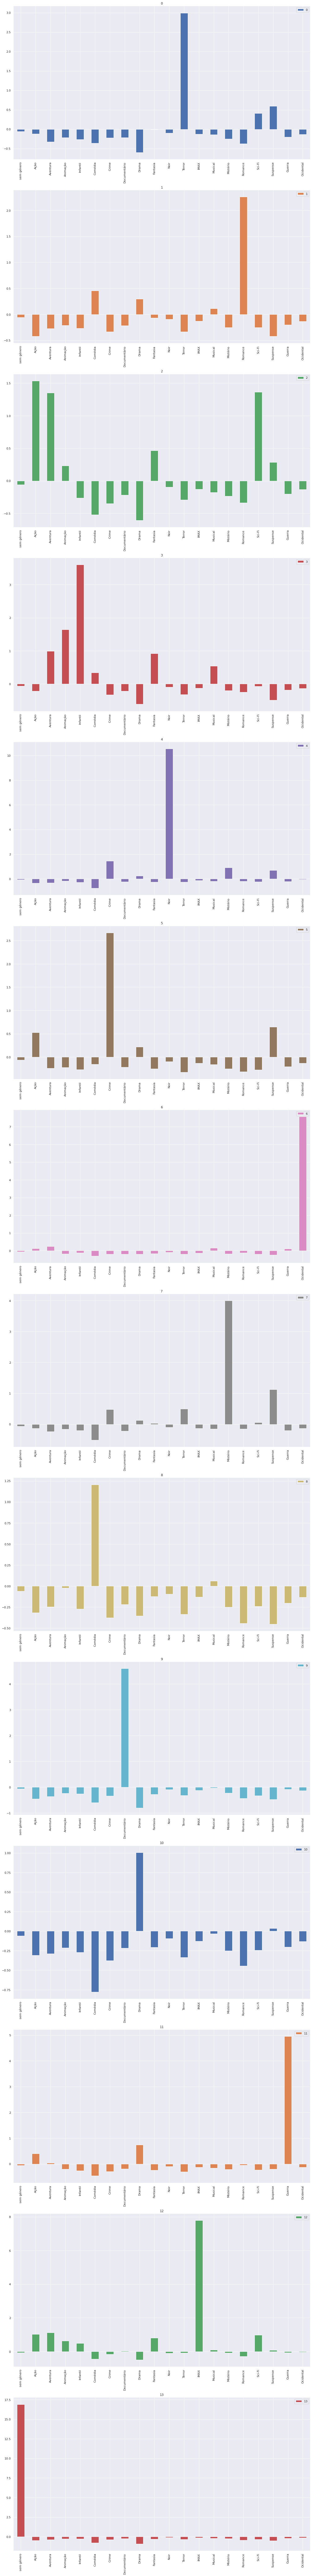

In [50]:
grupos.transpose().plot.bar(subplots=True,
                sharex = False,
                figsize=(20,176))

In [51]:
grupo = 15
filtro = modelo.labels_ ==  grupo
dados_filmes[filtro].head()

,Id,titulo,sem gênero,Ação,Aventura,Animação,Infantil,Comédia,Crime,Documentário,Drama,Fantasia,Noir,Terror,IMAX,Musical,Mistério,Romance,Sci-Fi,Suspense,Guerra,Ocidental


## Visualizando TSNE no Scatter Plot

In [52]:
from sklearn.manifold import TSNE
import seaborn as sns

tsne = TSNE()

visualizacao = tsne.fit_transform(generos_escalados)

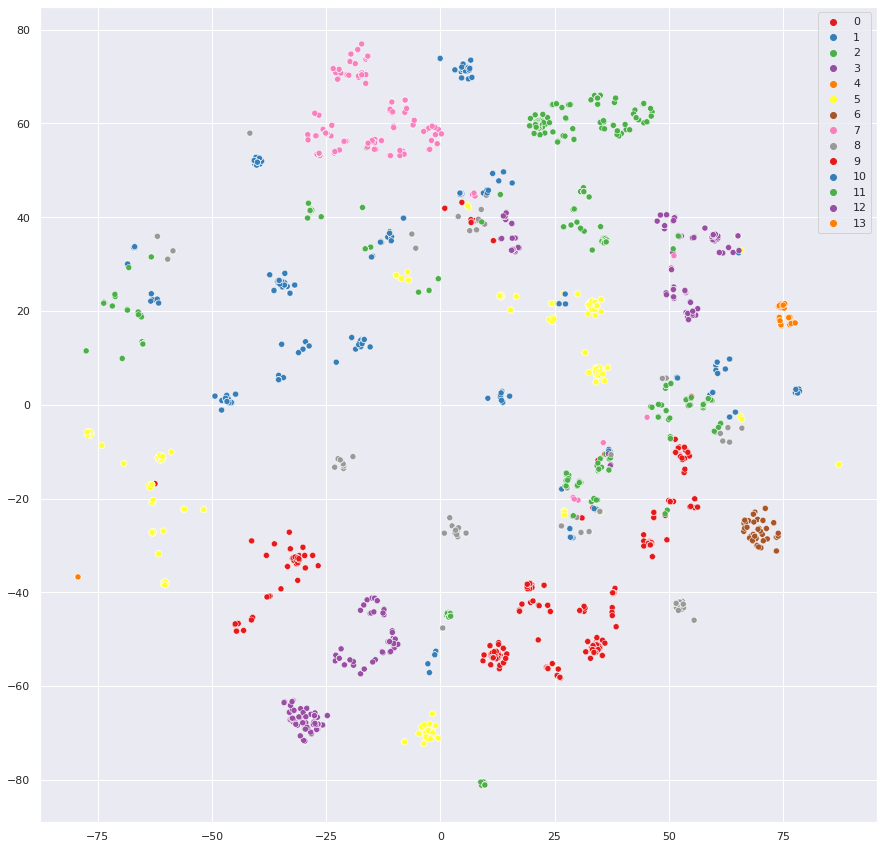

In [54]:
sns.set( rc= {'figure.figsize':(15,15)})
sns.scatterplot(x= visualizacao[:,0], 
                y= visualizacao[:,1],
                hue = modelo.labels_,
                palette = sns.color_palette('Set1', 14))